In [3]:
%pip install opendatasets

  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata
  Using cached opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Obtaining dependency information for kaggle from https://files.pythonhosted.org/packages/84/77/19ab253a2fb7966b5632e1abc237473814667bf908e0f1cd2671520ae6b9/kaggle-1.8.2-py3-none-any.whl.metadata
  Using cached kaggle-1.8.2-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for black>=24.10.0 from https://files.pythonhosted.org/packages/96/fb/f7dc2793a22cdf74a72114b5ed77fe3349a2e09ef34565857a2f917abdf2/black-25.11.0-cp312-cp312-win_amd64.whl.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# **1. Data Loading**

In [ ]:
df = pd.read_csv('/content/calories-burnt-prediction/calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# **2. EDA**

In [ ]:
df.shape

(15000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
df.nunique()

,0
User_ID,15000
Gender,2
Age,60
Height,90
Weight,91
Duration,30
Heart_Rate,59
Body_Temp,45
Calories,277


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualizatiion

Text(0.5, 1.0, 'Gender Distribution')

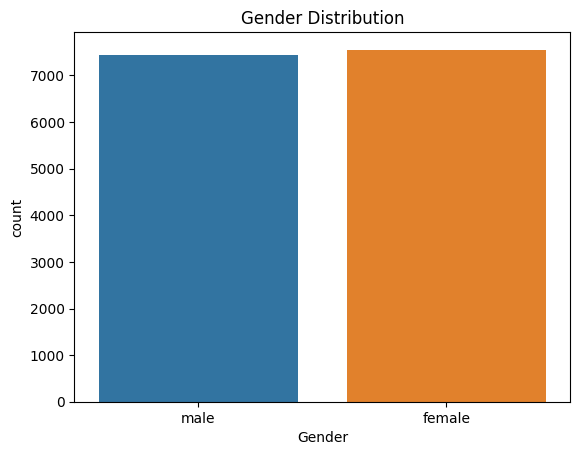

In [ ]:
sns.countplot(x = df['Gender'], hue = df['Gender'])
plt.title('Gender Distribution')

/tmp/ipython-input-12-4041224163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0.5, 1.0, 'Age Distribution')

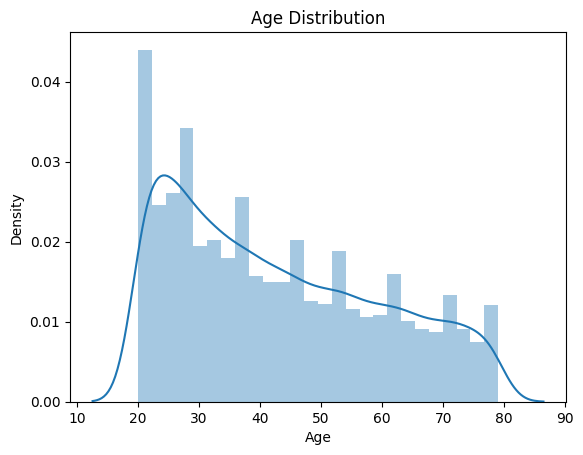

In [ ]:
sns.distplot(df['Age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Calories Burnt by Gender')

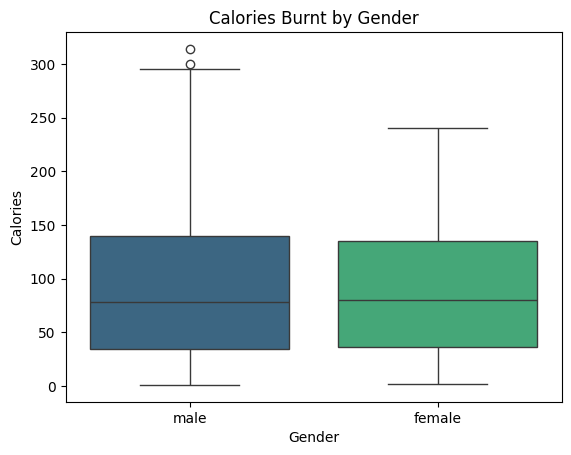

In [ ]:
sns.boxplot(x='Gender', y='Calories', data=df, hue= 'Gender', palette = 'viridis')
plt.title('Calories Burnt by Gender')

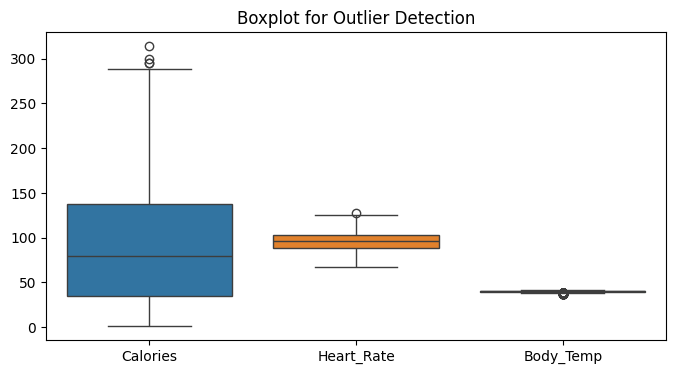

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Calories', 'Heart_Rate', 'Body_Temp']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
df_filtered = df.drop('Gender', axis=1)

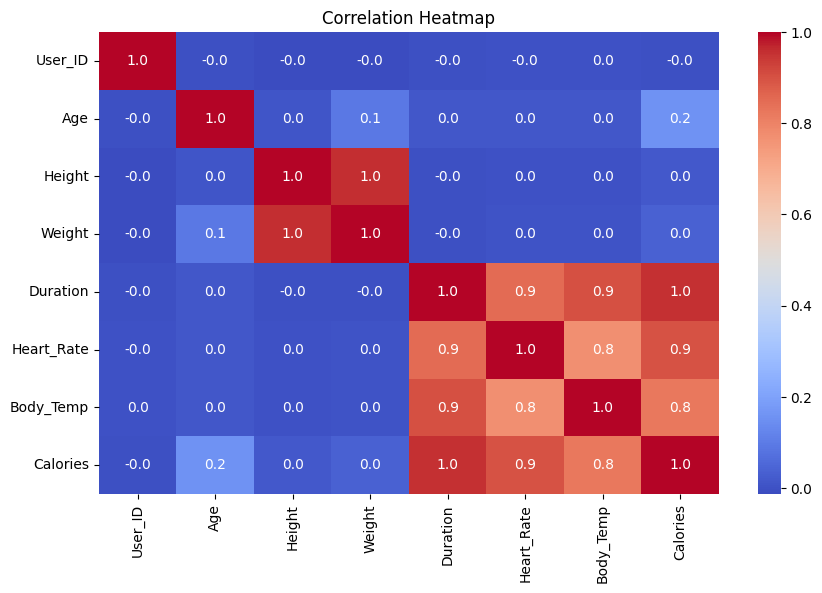

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

# **3. Data Cleaning & Preprocessing**

In [ ]:
#converting gender labels
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# **4. Model Building**

In [ ]:
X = df.drop(columns= ['User_ID','Calories'], axis=1)
y = df['Calories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# **5. Model Evaluation**

In [ ]:
model.score(X_train_scaled, y_train)

0.9671621074066676

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Mean Squared Error train:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error test:", mean_squared_error(y_test, y_pred))

Mean Squared Error train: 126.94582456688235
Mean Squared Error test: 131.99574575081695


In [ ]:
print("R2 Score train:", r2_score(y_train, y_train_pred))
print("R2 Score test:", r2_score(y_test, y_pred))

R2 Score train: 0.9671621074066676
R2 Score test: 0.9672937151257295


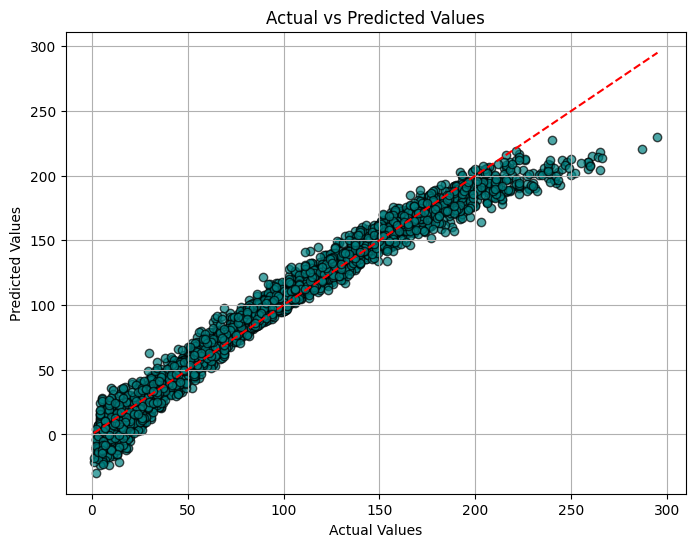

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
joblib.dump(model, "calorie_model.pkl")
joblib.dump(scaler, "scaler.pkl")